# Session 8: Linear Algebra for AI & Machine Learning
# Principal Component Analysis


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia



In [5]:
from sklearn.decomposition import PCA
my_PCA=PCA(n_components=3)                  #PCA is going to pick the first three components (axes) and later in the next line will project dataset to this set of three axes.  
Dataset_in_3D=my_PCA.fit_transform(Dataset) # you have to define and Dataset first

NameError: ignored

In [6]:
from sklearn.decomposition import PCA
my_PCA=PCA(.75)                  #PCA is going to pick the number of components (axes) that maintain %75 of the variance of the original dataset (or any other value that you enter) , and later in the next line will project dataset to this set of axes.  
Reduced_Dataset=my_PCA.fit_transform(Dataset)


NameError: ignored

original dimension is  4
reduced dimension is 3


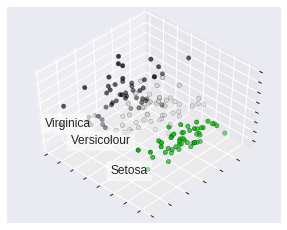

In [7]:

# This example is from scikit-learn's website: http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
#I edited and modified it for the class use. - Behnam Kia



# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

print("original dimension is ",iris.data.shape[1])  # mnist images are 28*28. 28*28 is 784

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

print("reduced dimension is 3")

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [8]:
# this code is originally developed by Michael Galarnyk, please see his github site https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb  
#I edited and modified it for the class use. - Behnam Kia

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
mnist = fetch_mldata('MNIST original')
print("original dimension is ",mnist.data.shape[1])  # mnist images are 28*28. 28*28 is 784
pca = PCA(.75)
lower_dimensional_data = pca.fit_transform(mnist.data)
print("the number of dimensions that preserve 75% of the variance is",pca.n_components_)
approximation = pca.inverse_transform(lower_dimensional_data)

original dimension is  784
the number of dimensions that preserve 75% of the variance is 33


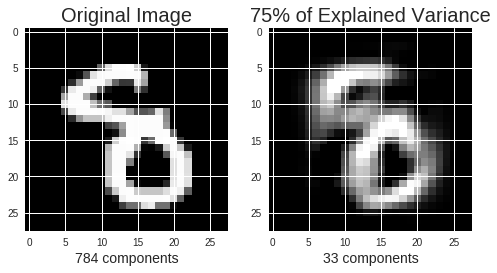

In [29]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(mnist.data[50000].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[50000].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('33 components', fontsize = 14)
plt.title('75% of Explained Variance', fontsize = 20);